# Pedro

In [1]:
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image 
from six import StringIO
import matplotlib.image as mpimg
#%pylab inline

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

#!pip install biopython
from Bio import Entrez
from Bio import SeqIO

In [2]:
url  = "https://raw.githubusercontent.com/waldeyr/Pedro_RED_SPL/main/RED_SPL_severe.csv"
df = pd.read_csv(url,  sep=',' )

In [3]:
df.sample(n=2)

,Region,Position,freq0,frq1,subs,p,p_adj,sym,ensembl_id,type,...,aa_change,codons_change,defSubs,converge_RED_AS,Dif_freq,sift_score,polyphen_score,RED_type,annoted,mirna_score
1004,chr19,15358791,0,11,CT GA,1.883486e-04,0.019322,AKAP8,ENSG00000105127,exon UTR,...,NaN,NaN,CT,0,0.108333,0.0,0.0,NaN,0,0.0
950,chr17,80380861,0,9,CT,6.478051e-07,0.000185,RNF213,ENSG00000173821,exon,...,H,caC/caT,CT,0,0.146864,0.0,0.0,NaN,0,0.0


In [4]:
df.columns

Index(['Region', 'Position', 'freq0', 'frq1', 'subs', 'p', 'p_adj', 'sym',
       'ensembl_id', 'type', 'A3SS', 'A5SS', 'MXE', 'RI', 'SE', 'logFcExp',
       'Delta_Free_energy', 'genetic_var', 'most_severe_cons', 'all_cons',
       'aa_change', 'codons_change', 'defSubs', 'converge_RED_AS', 'Dif_freq',
       'sift_score', 'polyphen_score', 'RED_type', 'annoted', 'mirna_score'],
      dtype='object')

In [5]:
temp = df.all_cons.str.split(' ', expand=True)
temp.columns = ['cons01', 'cons02', 'cons03', 'cons04', 'cons05', 'cons06', 'cons07', 'cons08', 'cons09', 'cons10', 'cons11']

In [6]:
df = pd.concat([df, temp], axis=1)

In [7]:
df.columns

Index(['Region', 'Position', 'freq0', 'frq1', 'subs', 'p', 'p_adj', 'sym',
       'ensembl_id', 'type', 'A3SS', 'A5SS', 'MXE', 'RI', 'SE', 'logFcExp',
       'Delta_Free_energy', 'genetic_var', 'most_severe_cons', 'all_cons',
       'aa_change', 'codons_change', 'defSubs', 'converge_RED_AS', 'Dif_freq',
       'sift_score', 'polyphen_score', 'RED_type', 'annoted', 'mirna_score',
       'cons01', 'cons02', 'cons03', 'cons04', 'cons05', 'cons06', 'cons07',
       'cons08', 'cons09', 'cons10', 'cons11'],
      dtype='object')

In [8]:
def getChromossome( ncbi_id ):
    if "chr" in ncbi_id: 
        return ncbi_id
    else:
        Entrez.email = "waldeyr@gmail.com"
        with Entrez.efetch( db="nucleotide", rettype="gb", id=ncbi_id ) as handle:
            record = SeqIO.read(handle, "gb")
            for f in record.features:
                if f.qualifiers['chromosome'][0]:
                    return "chr" + str(f.qualifiers['chromosome'][0])
                else:
                    return ncbi_id
            
df['Region'] = df['Region'].apply(lambda x: getChromossome(x))

In [9]:
def setRegion(Region):
    if Region == 'chrX': return 23 # chromossome X
    if Region == 'chrY': return 24 # chromossome Y
    if Region == 'chrM': return 25 # Mitochondrial
    return re.sub('chr', '', Region)

df['Region'] = df['Region'].apply(lambda x: setRegion(str(x)))

In [10]:
df = df.fillna(int(0)) # all NaN fields are strings type, so they will be factorize later and the zero will be a category

In [11]:
df.drop('most_severe_cons', axis=1, inplace=True)
df.drop('all_cons', axis=1, inplace=True)

In [12]:
df.drop('cons02', axis=1, inplace=True)
df.drop('cons03', axis=1, inplace=True)
df.drop('cons04', axis=1, inplace=True)
df.drop('cons05', axis=1, inplace=True)
df.drop('cons06', axis=1, inplace=True)
df.drop('cons07', axis=1, inplace=True)
df.drop('cons08', axis=1, inplace=True)
df.drop('cons09', axis=1, inplace=True)
df.drop('cons10', axis=1, inplace=True)
df.drop('cons11', axis=1, inplace=True)

In [13]:
df.Region           = pd.factorize(df.Region, na_sentinel=None)[0]
df.subs             = pd.factorize(df.subs, na_sentinel=None)[0]
df.defSubs          = pd.factorize(df.defSubs, na_sentinel=None)[0]
df.sym              = pd.factorize(df.sym, na_sentinel=None)[0]
df.ensembl_id       = pd.factorize(df.ensembl_id, na_sentinel=None)[0]
df.type             = pd.factorize(df.type, na_sentinel=None)[0]
df.genetic_var      = pd.factorize(df.genetic_var, na_sentinel=None)[0]
df.aa_change        = pd.factorize(df.aa_change, na_sentinel=None)[0]
df.codons_change    = pd.factorize(df.codons_change, na_sentinel=None)[0]
df.RED_type         = pd.factorize(df.RED_type, na_sentinel=None)[0]
df.cons01           = pd.factorize(df.cons01, na_sentinel=None)[0]
# df.cons02           = pd.factorize(df.cons02, na_sentinel=None)[0]
# df.cons03           = pd.factorize(df.cons03, na_sentinel=None)[0]
# df.cons04           = pd.factorize(df.cons04, na_sentinel=None)[0]
# df.cons05           = pd.factorize(df.cons05, na_sentinel=None)[0]
# df.cons06           = pd.factorize(df.cons06, na_sentinel=None)[0]
# df.cons07           = pd.factorize(df.cons07, na_sentinel=None)[0]
# df.cons08           = pd.factorize(df.cons08, na_sentinel=None)[0]
# df.cons09           = pd.factorize(df.cons09, na_sentinel=None)[0]
# df.cons10           = pd.factorize(df.cons10, na_sentinel=None)[0]
# df.cons11           = pd.factorize(df.cons11, na_sentinel=None)[0]

In [14]:
df.tail()

,Region,Position,freq0,frq1,subs,p,p_adj,sym,ensembl_id,type,...,codons_change,defSubs,converge_RED_AS,Dif_freq,sift_score,polyphen_score,RED_type,annoted,mirna_score,cons01
1699,22,77828020,0,0,10,0.000007,0.001372,859,857,1,...,1,0,0,0.113218,0.0,0.0,2,1,151.0,6
1700,22,77828148,0,0,0,0.000224,0.022281,859,857,1,...,1,0,0,0.324261,0.0,0.0,2,1,122.0,6
1701,22,77828226,0,0,0,0.000146,0.015943,859,857,1,...,1,0,0,0.517585,0.0,0.0,2,1,154.0,6
1702,22,77828331,0,0,0,0.000005,0.001021,859,857,1,...,1,0,0,0.427361,0.0,0.0,2,1,174.0,6
1703,22,77828418,0,1,0,0.000024,0.003922,859,857,1,...,1,0,0,0.370509,0.0,0.0,2,1,122.0,6


In [15]:
y = df['cons01'].values

In [16]:
y

array([0, 1, 2, ..., 6, 6, 6])

In [17]:
# teste
df.drop('Position', axis=1, inplace=True)
df.drop('p', axis=1, inplace=True)
df.drop('p_adj', axis=1, inplace=True)
df.drop('ensembl_id', axis=1, inplace=True)

In [18]:
X = df.drop(['cons01'], axis=1)

In [19]:
X.columns

Index(['Region', 'freq0', 'frq1', 'subs', 'sym', 'type', 'A3SS', 'A5SS', 'MXE',
       'RI', 'SE', 'logFcExp', 'Delta_Free_energy', 'genetic_var', 'aa_change',
       'codons_change', 'defSubs', 'converge_RED_AS', 'Dif_freq', 'sift_score',
       'polyphen_score', 'RED_type', 'annoted', 'mirna_score'],
      dtype='object')

In [20]:
X.dtypes

Region                 int64
freq0                  int64
frq1                   int64
subs                   int64
sym                    int64
type                   int64
A3SS                   int64
A5SS                   int64
MXE                    int64
RI                     int64
SE                     int64
logFcExp             float64
Delta_Free_energy    float64
genetic_var            int64
aa_change              int64
codons_change          int64
defSubs                int64
converge_RED_AS        int64
Dif_freq             float64
sift_score           float64
polyphen_score       float64
RED_type               int64
annoted                int64
mirna_score          float64
dtype: object

In [21]:
X

,Region,freq0,frq1,subs,sym,type,A3SS,A5SS,MXE,RI,...,aa_change,codons_change,defSubs,converge_RED_AS,Dif_freq,sift_score,polyphen_score,RED_type,annoted,mirna_score
0,0,0,8,0,0,0,0,0,0,0,...,0,0,0,0,-0.477151,0.0,0.0,0,0,148.0
1,0,0,2,1,1,1,0,0,2,0,...,1,1,1,0,0.556695,0.0,0.0,0,0,140.0
2,0,0,0,2,2,2,1,1,0,0,...,1,1,2,0,0.069891,0.0,0.0,0,0,140.0
3,0,0,0,3,2,2,1,1,0,0,...,1,1,3,0,0.099333,0.0,0.0,0,0,122.0
4,0,0,10,0,3,2,0,0,0,0,...,1,1,0,0,0.150064,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,22,0,0,10,859,1,0,0,0,0,...,1,1,0,0,0.113218,0.0,0.0,2,1,151.0
1700,22,0,0,0,859,1,0,0,0,0,...,1,1,0,0,0.324261,0.0,0.0,2,1,122.0
1701,22,0,0,0,859,1,0,0,0,0,...,1,1,0,0,0.517585,0.0,0.0,2,1,154.0
1702,22,0,0,0,859,1,0,0,0,0,...,1,1,0,0,0.427361,0.0,0.0,2,1,174.0


In [22]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 1)

In [23]:
arvore = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=30, random_state=0)

In [24]:
modelo = arvore.fit(X_treino, y_treino)

Populating the interactive namespace from numpy and matplotlib


[Text(1395.0, 1812.0, 'codons_change <= 1.5\nentropy = 2.88\nsamples = 1533\nvalue = [125, 144, 8, 2, 421, 114, 380, 181, 42, 66, 26\n13, 6, 2, 1, 2]'),
 Text(697.5, 1087.2, 'type <= 1.5\nentropy = 2.339\nsamples = 1150\nvalue = [1, 100, 4, 2, 413, 0, 370, 128, 42, 62, 14, 10\n0, 2, 0, 2]'),
 Text(348.75, 362.39999999999986, 'entropy = 2.214\nsamples = 692\nvalue = [1, 81, 1, 1, 49, 0, 352, 105, 27, 59, 13, 2, 0\n1, 0, 0]'),
 Text(1046.25, 362.39999999999986, 'entropy = 1.305\nsamples = 458\nvalue = [0, 19, 3, 1, 364, 0, 18, 23, 15, 3, 1, 8, 0\n1, 0, 2]'),
 Text(2092.5, 1087.2, 'sift_score <= 0.005\nentropy = 2.52\nsamples = 383\nvalue = [124, 44, 4, 0, 8, 114, 10, 53, 0, 4, 12, 3, 6\n0, 1, 0]'),
 Text(1743.75, 362.39999999999986, 'entropy = 2.12\nsamples = 195\nvalue = [117, 12, 3, 0, 5, 11, 6, 25, 0, 1, 7, 2, 6\n0, 0, 0]'),
 Text(2441.25, 362.39999999999986, 'entropy = 2.065\nsamples = 188\nvalue = [7, 32, 1, 0, 3, 103, 4, 28, 0, 3, 5, 1, 0, 0\n1, 0]')]

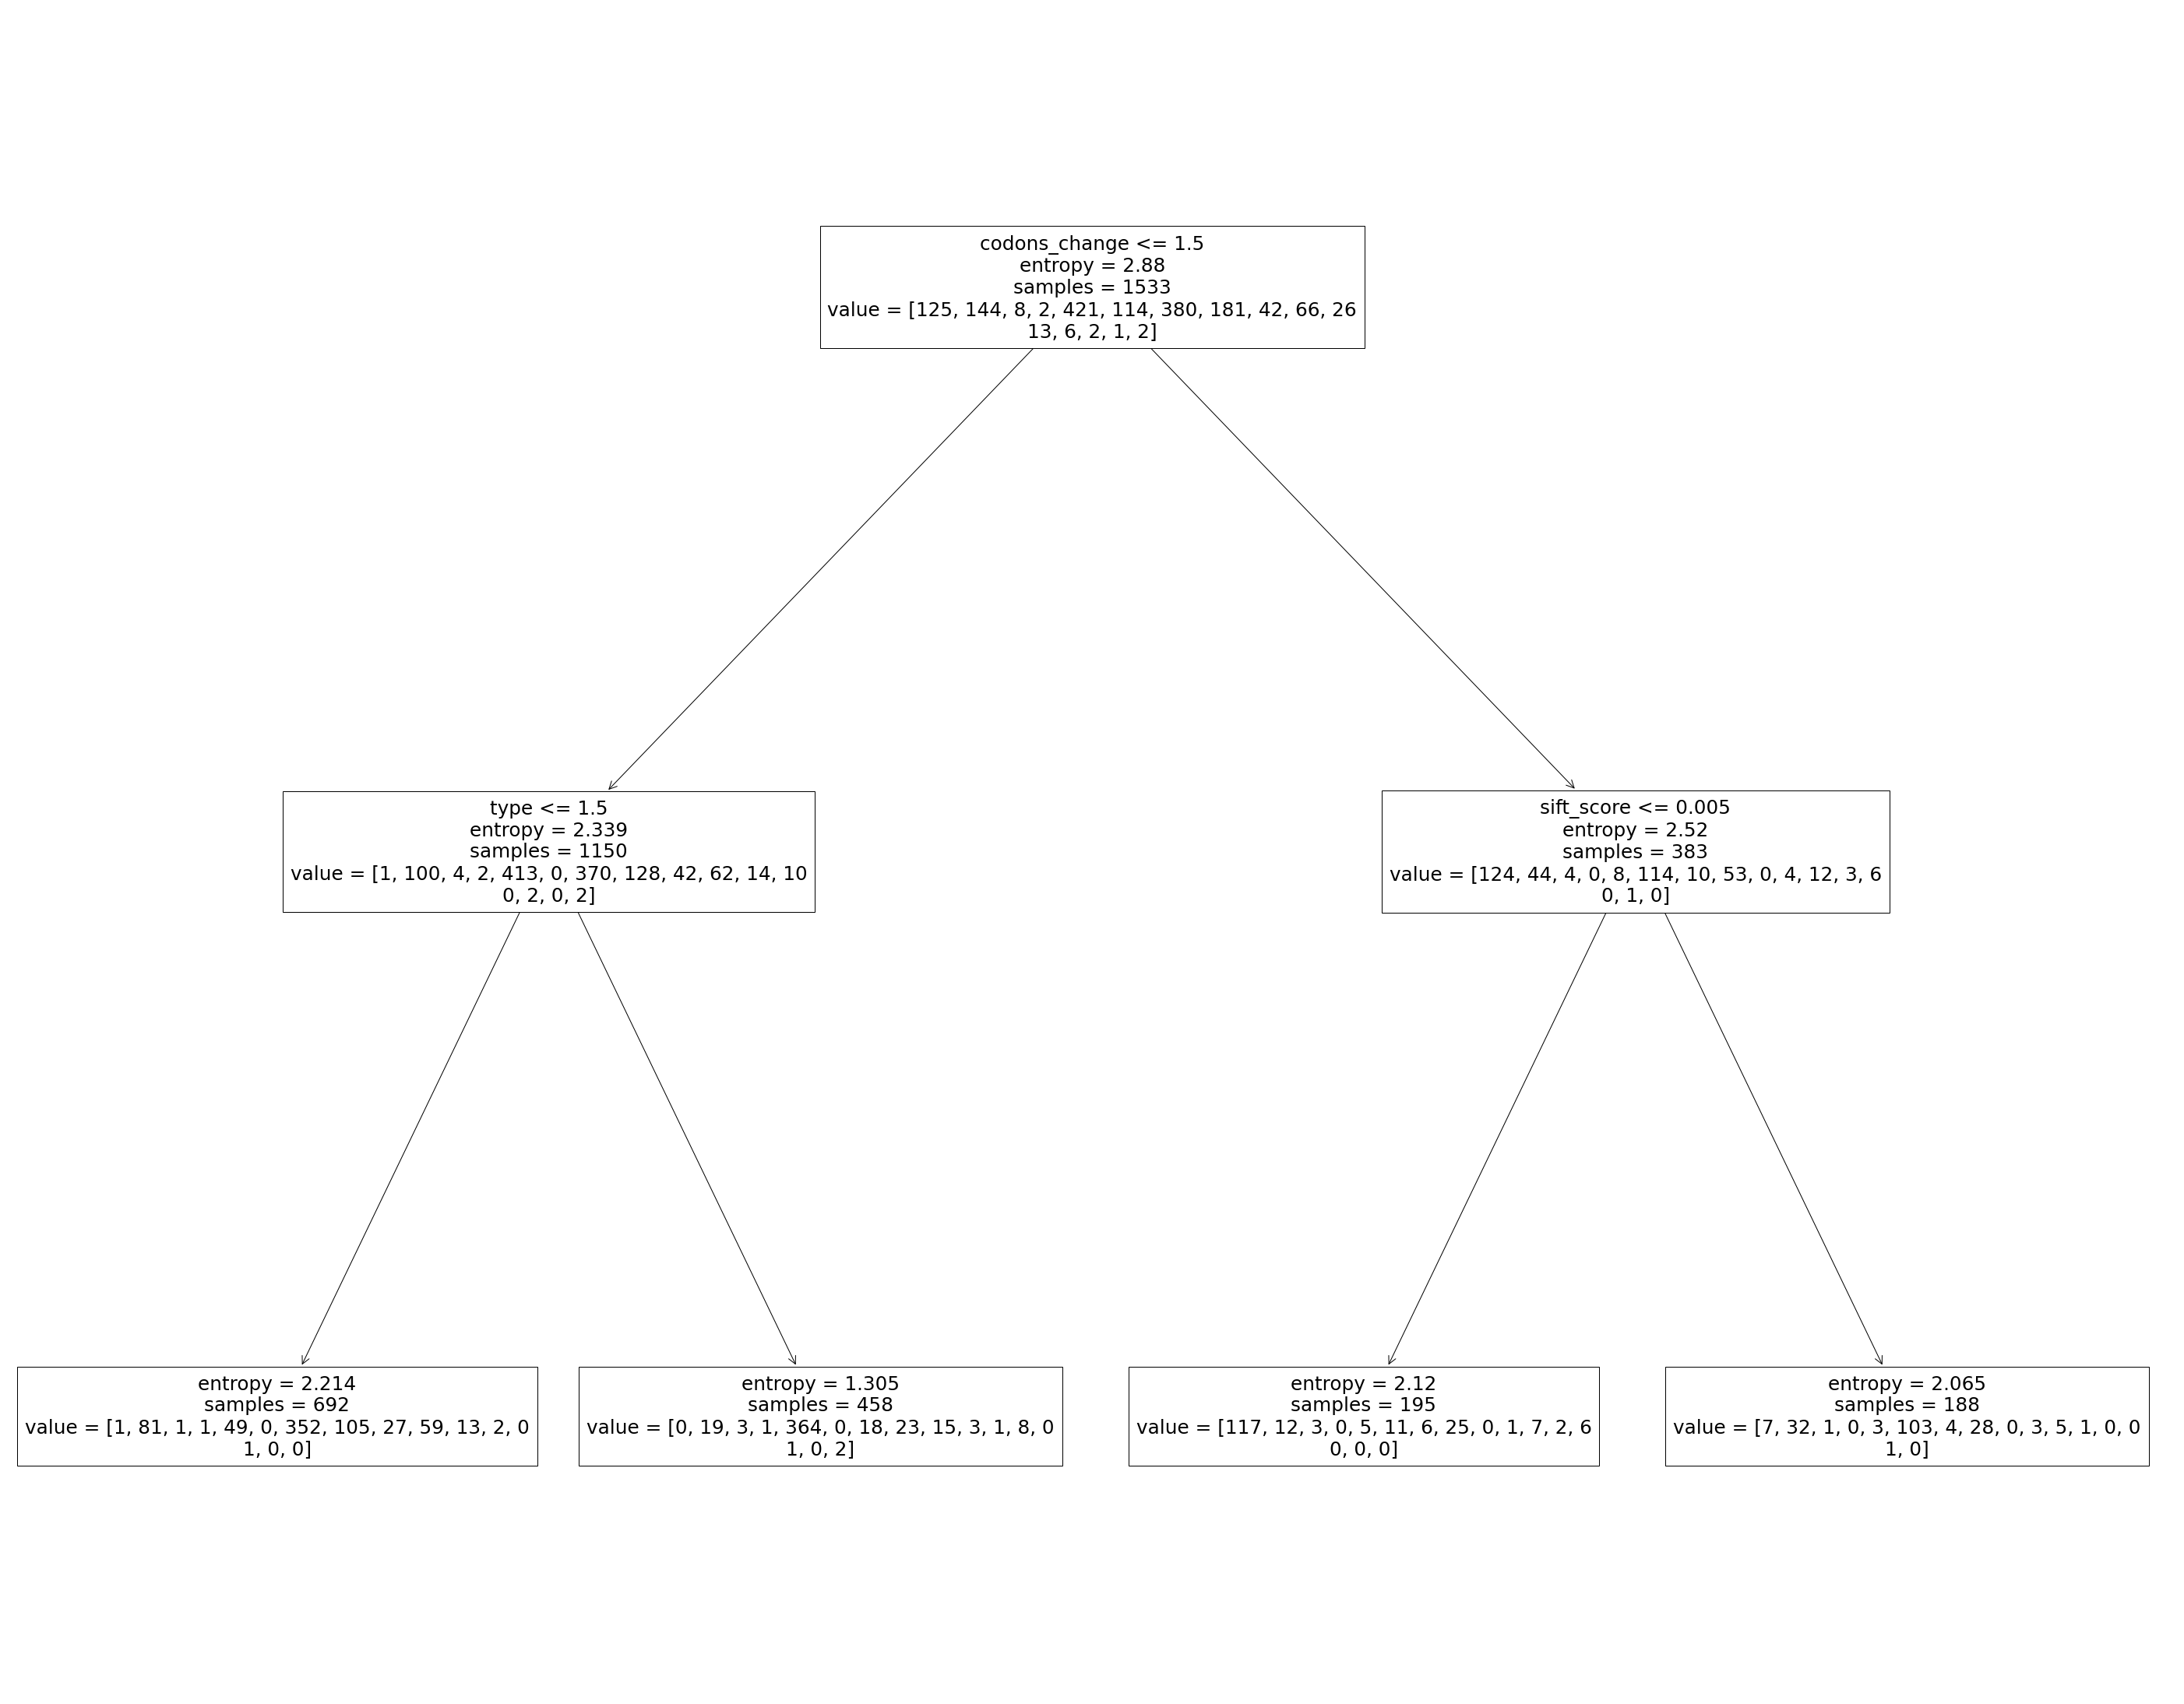

In [25]:
%pylab inline
previsao = arvore.predict(X_teste)
np.sqrt(mean_squared_error(y_teste, previsao))
pylab.figure(figsize=(50,40))
plot_tree(arvore, feature_names=X_treino.columns)

In [26]:
# Aplicando mo modelo gerado na base de testes
y_predicoes = modelo.predict(X_teste)

# Avaliação do modelo
print(f"Acurácia da árvore: {metrics.accuracy_score(y_teste, y_predicoes)}")
print(classification_report(y_teste, y_predicoes))

Acurácia da árvore: 0.631578947368421
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.85      0.83      0.84        53
           5       0.74      0.82      0.78        17
           6       0.49      0.93      0.64        43
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         4

    accuracy                           0.63       171
   macro avg       0.24      0.33      0.27       171
weighted avg       0.49      0.63      0.54       171



/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
